In [1]:
import numpy as np
import matplotlib
import netCDF4
from netCDF4 import Dataset,num2date
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import Functions_2GVecCI as fcs
from tigramite import data_processing as pp

In [2]:
xdata = xr.open_dataset('AirTempData.nc')

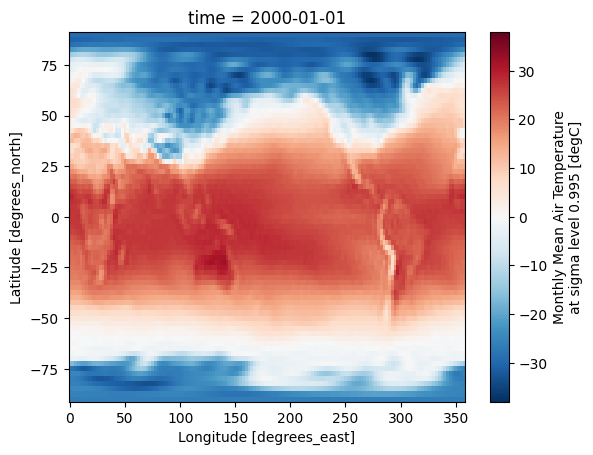

In [3]:
xdata.sel(time='2000-01-01')['air'].plot()

In [4]:
i, j, k, l = 2, 3, 3, 2

In [5]:
Xregion = xdata.sel(lat=slice(6.,-6.,k), lon = slice(190.,240.,i))
Yregion = xdata.sel(lat=slice(65.,50.,j), lon = slice(200.,240.,l))

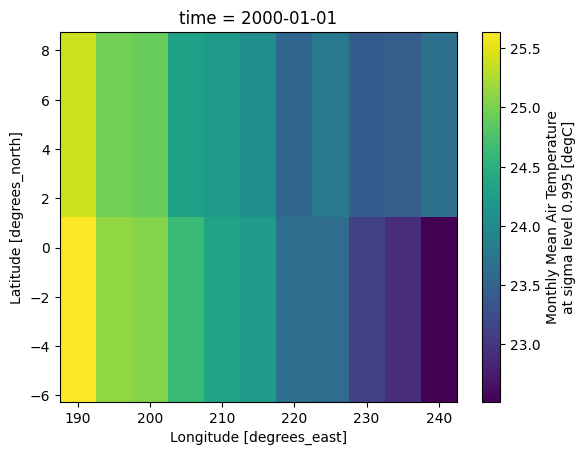

In [6]:
Xregion.sel(time='2000-01-01')['air'].plot()

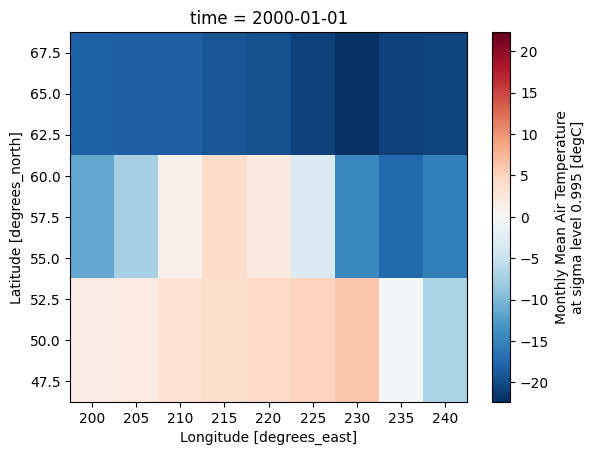

In [7]:
Yregion.sel(time='2000-01-01')['air'].plot()

In [8]:
monthlymean = Xregion.groupby("time.month").mean("time")
anomalies_Xregion = Xregion.groupby("time.month") - monthlymean

Yregion_monthlymean = Yregion.groupby("time.month").mean("time")
anomalies_Yregion = Yregion.groupby("time.month") - Yregion_monthlymean

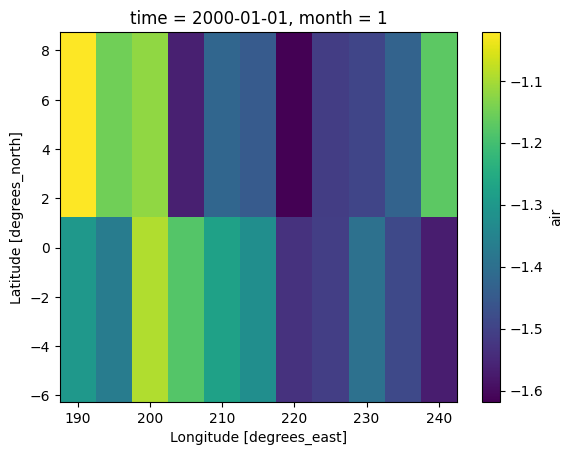

In [9]:
anomalies_Xregion.sel(time='2000-01-01')['air'].plot()

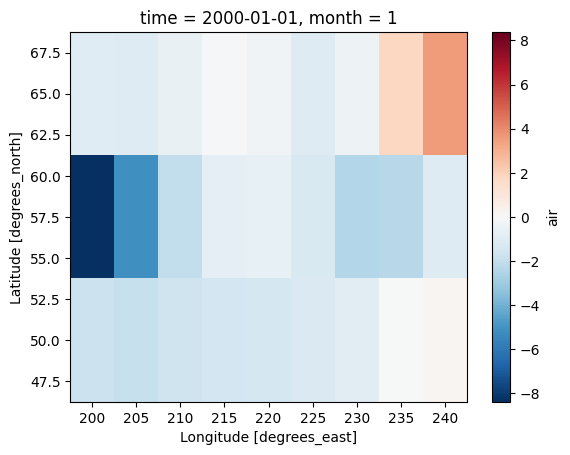

In [10]:
anomalies_Yregion.sel(time='2000-01-01')['air'].plot()

In [11]:
def is_ond(month):
    return (month >= 10) & (month <= 12)

def is_son(month):
    return (month >= 9) & (month <= 11)

def is_ndj(month):
    return ((month >= 11) & (month <= 12)) or (month==1)

def is_jfm(month):
    return (month >= 1) & (month <= 3)

In [12]:
ond_Xregion = anomalies_Xregion.sel(time=is_ond(xdata['time.month']))

ond_Xregion_by_year = ond_Xregion.groupby("time.year").mean()

num_ond_Xregion = np.array(ond_Xregion_by_year.to_array())[0]

reshaped_Xregion = np.reshape(num_ond_Xregion, newshape = (num_ond_Xregion.shape[0],num_ond_Xregion.shape[1]*num_ond_Xregion.shape[2]))

In [13]:
jfm_Yregion = anomalies_Yregion.sel(time=is_jfm(xdata['time.month']))

jfm_Yregion_by_year = jfm_Yregion.groupby("time.year").mean()

num_jfm_Yregion = np.array(jfm_Yregion_by_year.to_array())[0]

reshaped_Yregion = np.reshape(num_jfm_Yregion, newshape = (num_jfm_Yregion.shape[0],num_jfm_Yregion.shape[1]*num_jfm_Yregion.shape[2]))

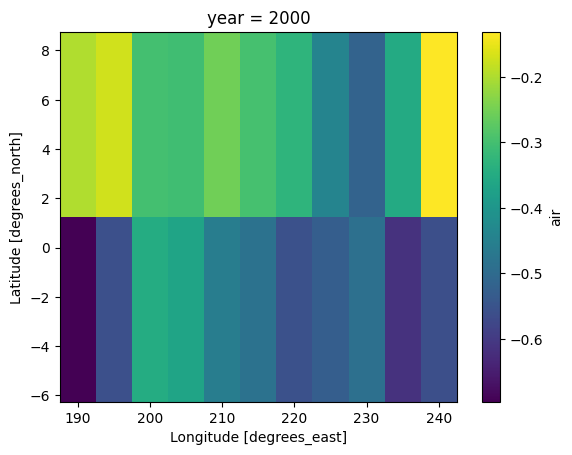

In [14]:
ond_Xregion_by_year.sel(year=2000)['air'].plot()

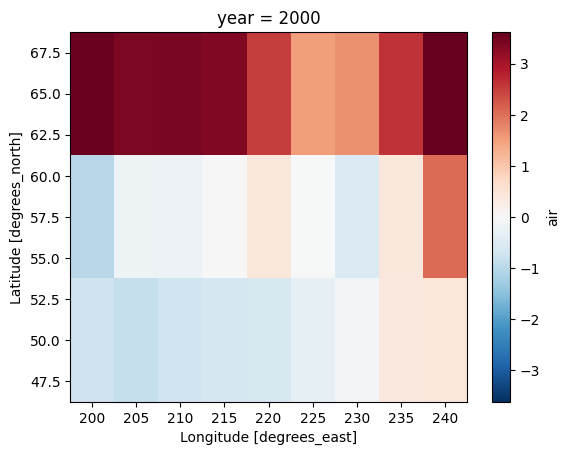

In [15]:
jfm_Yregion_by_year.sel(year=2000)['air'].plot()

In [17]:
abs(reshaped_Xregion.shape[1]-reshaped_Yregion.shape[1])<10

True